In [491]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.model_selection import learning_curve

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import validation_curve

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV

# Load data

In [492]:
data = pd.read_csv('df.csv', sep = ';', skipinitialspace = True)

In [493]:
data

,Day,Hour,System imbalance (MWh),Settlement price of imbalance\n(CZK/MWh),Settlement price – counter-imbalance (CZK/MWh)
0,vendredi 1 janvier 2021,1,56.685,-199.39,-1.00
1,vendredi 1 janvier 2021,2,35.897,-126.63,-1.00
2,vendredi 1 janvier 2021,3,-62.325,2 692.78,2 350.00
3,vendredi 1 janvier 2021,4,-14.414,2 429.27,2 350.00
4,vendredi 1 janvier 2021,5,-54.224,2 648.23,2 350.00
...,...,...,...,...,...
8755,vendredi 31 décembre 2021,20,66.526,-233.84,-1.00
8756,vendredi 31 décembre 2021,21,124.414,-436.44,-1.00
8757,vendredi 31 décembre 2021,22,113.625,-398.68,-1.00
8758,vendredi 31 décembre 2021,23,96.231,-337.80,-1.00


In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Day                                             8760 non-null   object 
 1   Hour                                            8760 non-null   int64  
 2   System imbalance (MWh)                          8760 non-null   float64
 3   Settlement price of imbalance
(CZK/MWh)         8760 non-null   object 
 4   Settlement price – counter-imbalance (CZK/MWh)  8760 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 342.3+ KB


In [495]:
data.isna().sum()

Day                                               0
Hour                                              0
System imbalance (MWh)                            0
Settlement price of imbalance\n(CZK/MWh)          0
Settlement price – counter-imbalance (CZK/MWh)    0
dtype: int64

In [496]:
start = '1/1/2021'
end =  '1/1/2022'
Datetime = pd.DataFrame(pd.date_range(start, end, freq = '60min'), columns= ['datetime'])

In [497]:
Datetime = Datetime[1:]
Datetime.reset_index(inplace= True)
Datetime

,index,datetime
0,1,2021-01-01 01:00:00
1,2,2021-01-01 02:00:00
2,3,2021-01-01 03:00:00
3,4,2021-01-01 04:00:00
4,5,2021-01-01 05:00:00
...,...,...
8755,8756,2021-12-31 20:00:00
8756,8757,2021-12-31 21:00:00
8757,8758,2021-12-31 22:00:00
8758,8759,2021-12-31 23:00:00


In [498]:
data['Datetime']= Datetime['datetime']

In [499]:
data = data[['System imbalance (MWh)', 'Datetime']]

In [500]:
    df = data.copy()
    
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek
    df['quarter'] = df['Datetime'].dt.quarter
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear
    df['dayofmonth'] = df['Datetime'].dt.day
    df['weekofyear'] = df['Datetime'].dt.weekofyear

In [672]:
df

,System imbalance (MWh),Datetime,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,56.685,2021-01-01 01:00:00,1,4,1,1,2021,1,1,53
1,35.897,2021-01-01 02:00:00,2,4,1,1,2021,1,1,53
2,-62.325,2021-01-01 03:00:00,3,4,1,1,2021,1,1,53
3,-14.414,2021-01-01 04:00:00,4,4,1,1,2021,1,1,53
4,-54.224,2021-01-01 05:00:00,5,4,1,1,2021,1,1,53
...,...,...,...,...,...,...,...,...,...,...
8755,66.526,2021-12-31 20:00:00,20,4,4,12,2021,365,31,52
8756,124.414,2021-12-31 21:00:00,21,4,4,12,2021,365,31,52
8757,113.625,2021-12-31 22:00:00,22,4,4,12,2021,365,31,52
8758,96.231,2021-12-31 23:00:00,23,4,4,12,2021,365,31,52


# Analysis the time series

In [501]:
df['System imbalance (MWh)'].describe()

count    8760.000000
mean      -29.844328
std        84.996528
min      -654.650000
25%       -71.041250
50%       -21.392500
75%        18.966250
max       432.643000
Name: System imbalance (MWh), dtype: float64

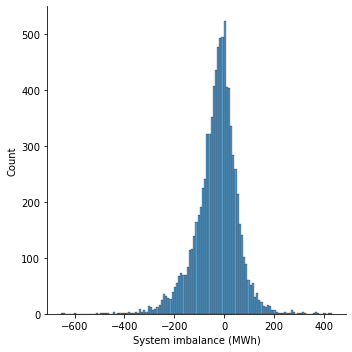

In [502]:
sns.displot(df['System imbalance (MWh)'])

<AxesSubplot:xlabel='System imbalance (MWh)'>

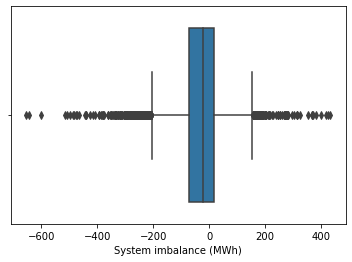

In [503]:
sns.boxplot(df['System imbalance (MWh)'])

(array([-800., -600., -400., -200.,    0.,  200.,  400.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

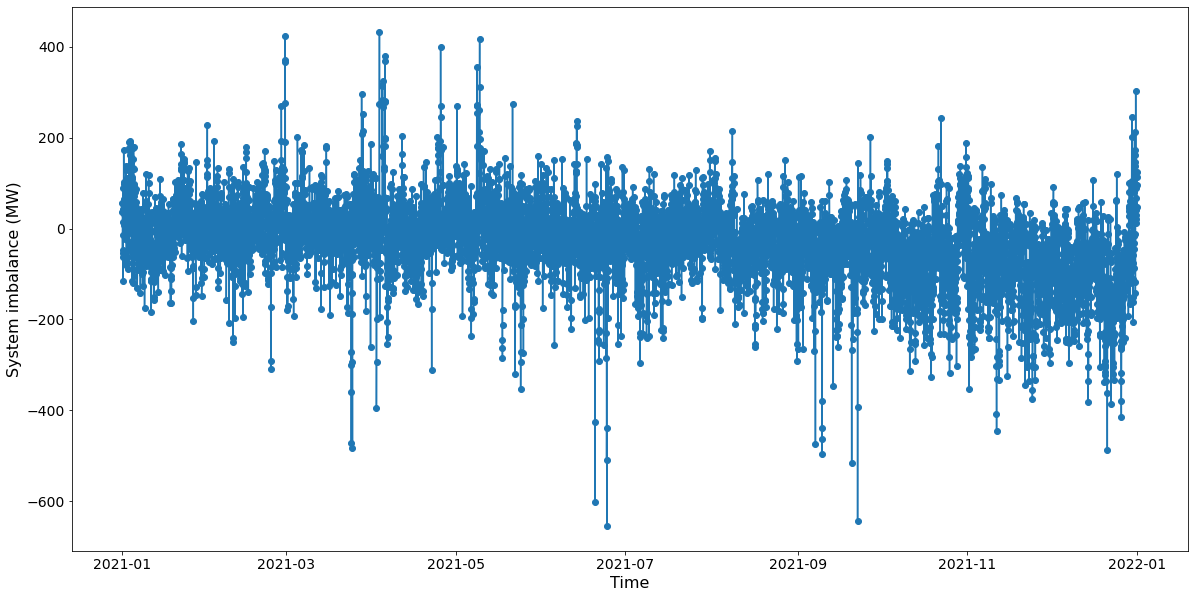

In [506]:
plt.figure(figsize=(20,10))
plt.scatter(df['Datetime'], df['System imbalance (MWh)'])
plt.plot(df['Datetime'], df['System imbalance (MWh)'])
plt.xlabel('Time', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('System imbalance (MW)', fontsize = 16)
plt.yticks(fontsize = 14)

In [507]:
data_day =data.groupby(pd.Grouper(key='Datetime', freq='D')).sum()
data_day.reset_index(inplace = True)

(array([-6000., -5000., -4000., -3000., -2000., -1000.,     0.,  1000.,
         2000.,  3000.,  4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

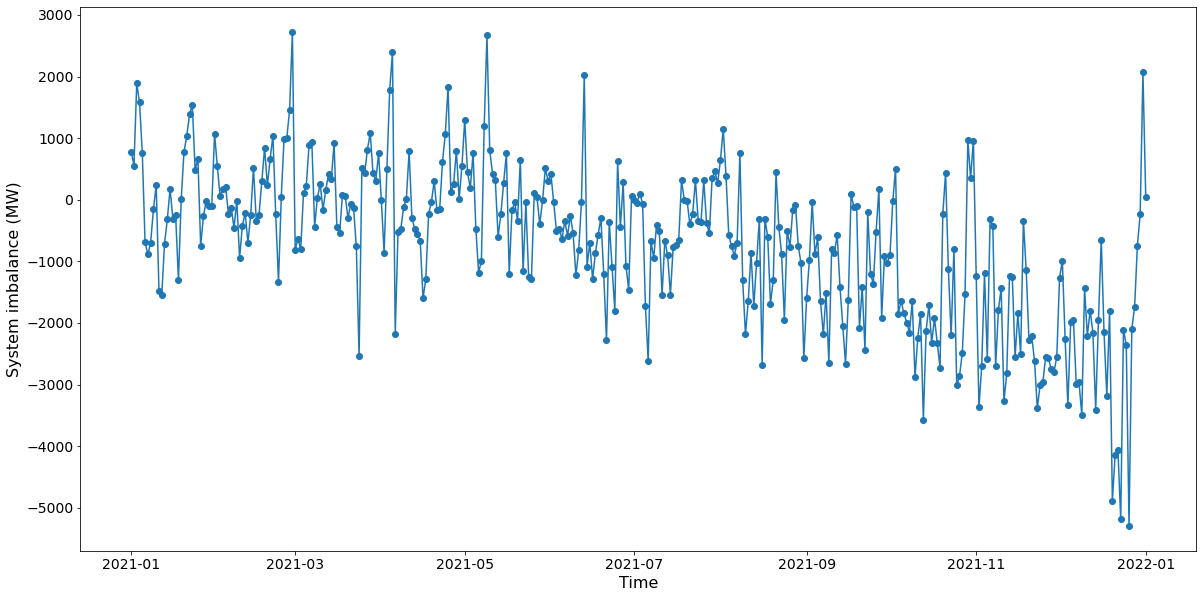

In [508]:
plt.figure(figsize=(20,10))
plt.scatter(data_day['Datetime'], data_day['System imbalance (MWh)'])
plt.plot(data_day['Datetime'], data_day['System imbalance (MWh)'])
plt.xlabel('Time', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('System imbalance (MW)', fontsize = 16)
plt.yticks(fontsize = 14)

In [509]:
data_week =data.groupby(pd.Grouper(key='Datetime', freq='W')).sum()
data_week.reset_index(inplace = True)

(array([-30000., -25000., -20000., -15000., -10000.,  -5000.,      0.,
          5000.,  10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

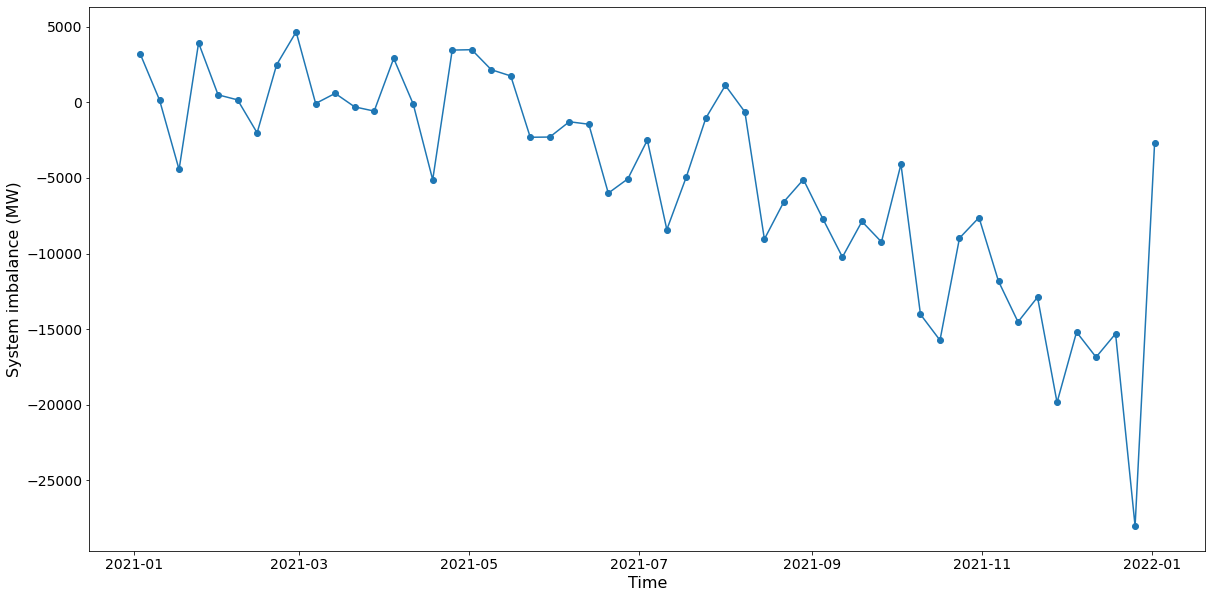

In [510]:
plt.figure(figsize=(20,10))
plt.scatter(data_week['Datetime'], data_week['System imbalance (MWh)'])
plt.plot(data_week['Datetime'], data_week['System imbalance (MWh)'])
plt.xlabel('Time', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('System imbalance (MW)', fontsize = 16)
plt.yticks(fontsize = 14)

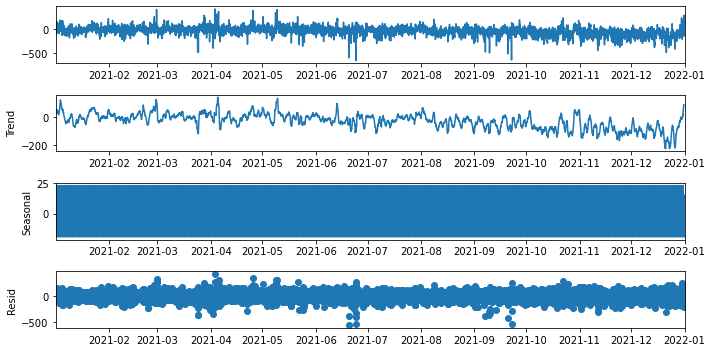

In [605]:
from statsmodels.tsa.seasonal import seasonal_decompose

dataset = data[['System imbalance (MWh)', 'Datetime']]
dataset.set_index('Datetime', inplace = True)

result = seasonal_decompose(dataset, model='additive')

result.plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

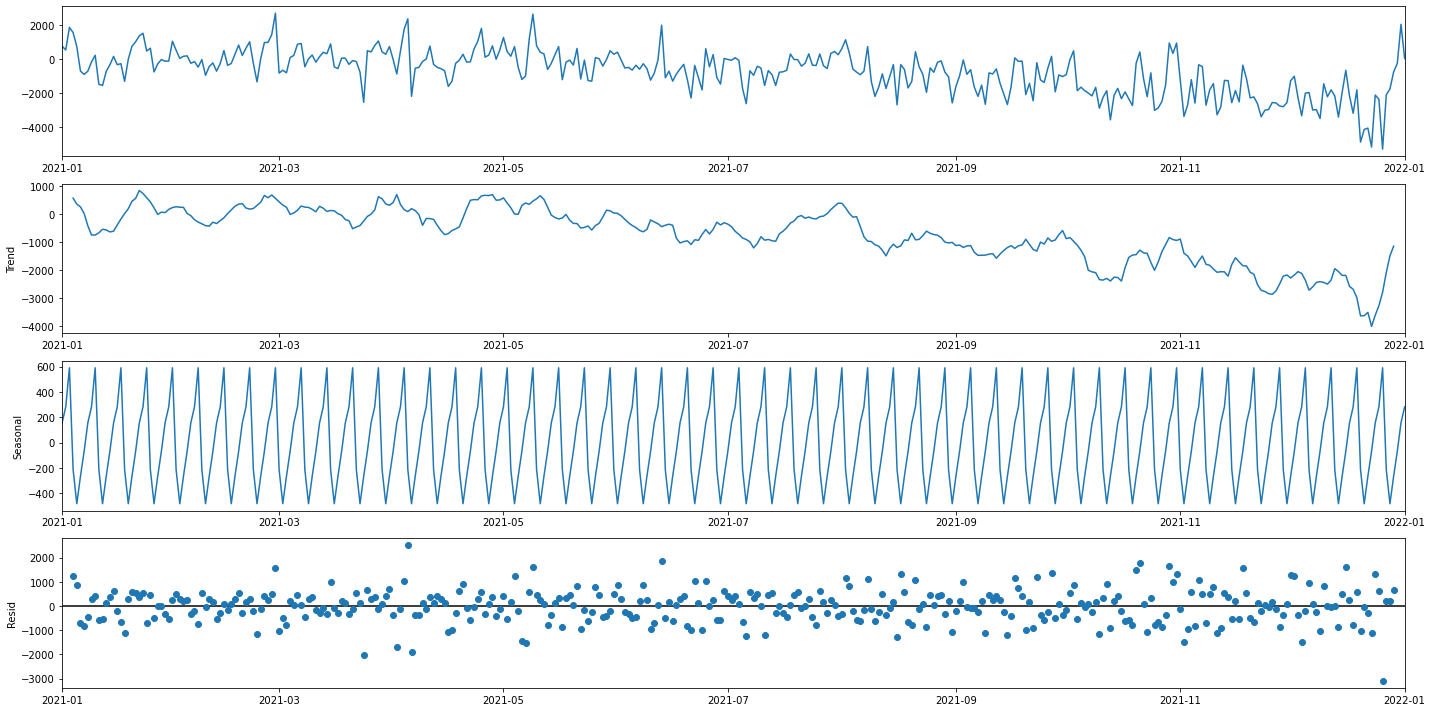

In [604]:
from statsmodels.tsa.seasonal import seasonal_decompose

dataset = data_day[['System imbalance (MWh)', 'Datetime']]
dataset.set_index('Datetime', inplace = True)

result = seasonal_decompose(dataset, model='additive')

result.plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

<Figure size 720x720 with 0 Axes>

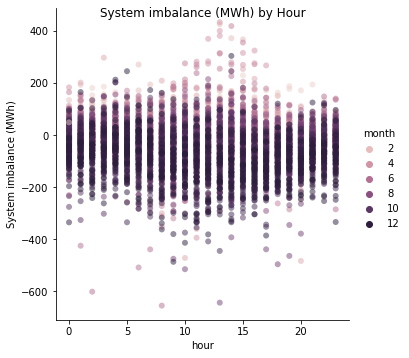

In [512]:
plt.figure(figsize=(10,10))
sns.pairplot(df,
             hue='month',
             x_vars=['hour',
                     #'dayofweek',
                     #'month','weekofyear'
                    ],
             y_vars='System imbalance (MWh)',
             height=5,
             plot_kws={'alpha':0.5, 'linewidth':0}
            )
plt.suptitle('System imbalance (MWh) by Hour')
plt.show()

<Figure size 720x720 with 0 Axes>

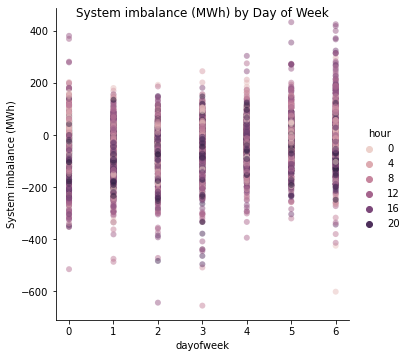

In [513]:
plt.figure(figsize=(10,10))
sns.pairplot(df,
             hue='hour',
             x_vars=[#'hour',
                     'dayofweek',
                     #'month','weekofyear'
                    ],
             y_vars='System imbalance (MWh)',
             height=5,
             plot_kws={'alpha':0.5, 'linewidth':0}
            )
plt.suptitle('System imbalance (MWh) by Day of Week')
plt.show()

<Figure size 720x720 with 0 Axes>

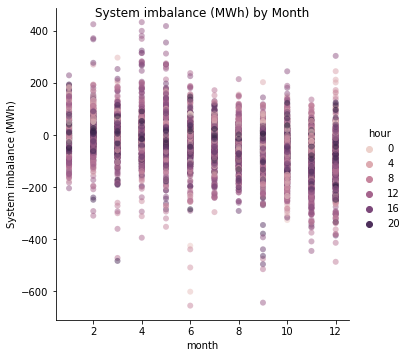

In [514]:
plt.figure(figsize=(10,10))
sns.pairplot(df,
             hue='hour',
             x_vars=[#'hour',
                     #'dayofweek',
                     'month',
                     #'weekofyear',
                    ],
             y_vars='System imbalance (MWh)',
             height=5,
             plot_kws={'alpha':0.5, 'linewidth':0}
            )
plt.suptitle('System imbalance (MWh) by Month')
plt.show()

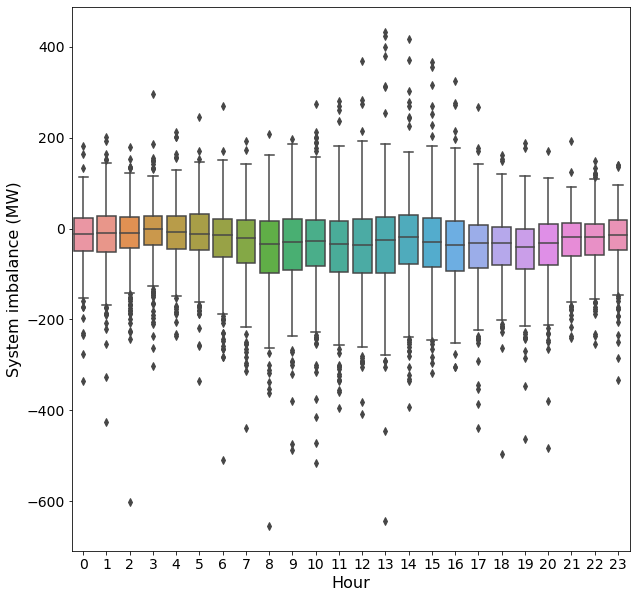

In [483]:
plt.figure(figsize=(10,10))
sns.boxplot(x='hour', y='System imbalance (MWh)', data = df)
plt.xlabel('Hour', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('System imbalance (MW)', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()
plt.show()

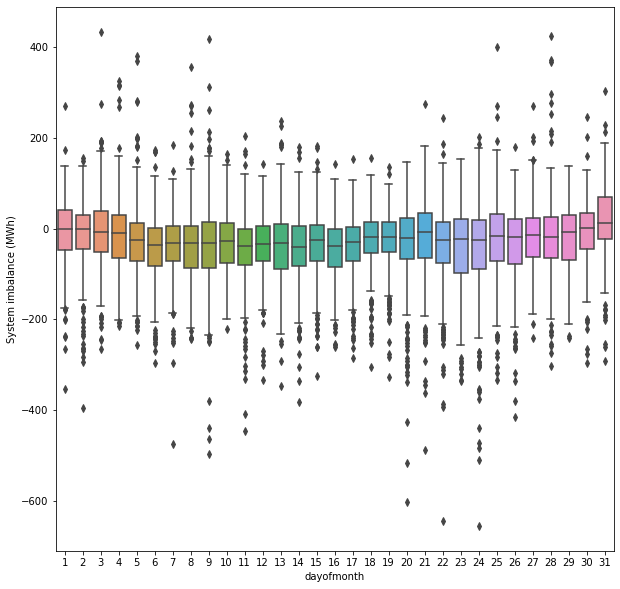

In [98]:
plt.figure(figsize=(10,10))
sns.boxplot(x='dayofmonth', y='System imbalance (MWh)', data = df)
plt.show()

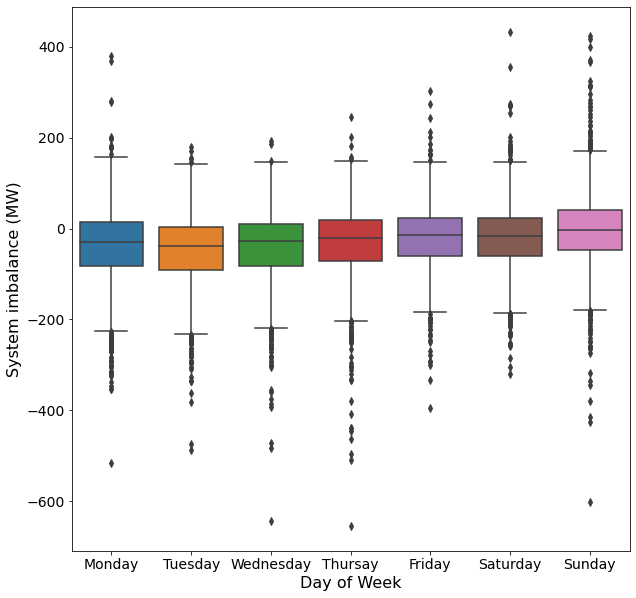

In [609]:
plt.figure(figsize=(10,10))
sns.boxplot(x='dayofweek', y='System imbalance (MWh)', data = df)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursay', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('System imbalance (MW)', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

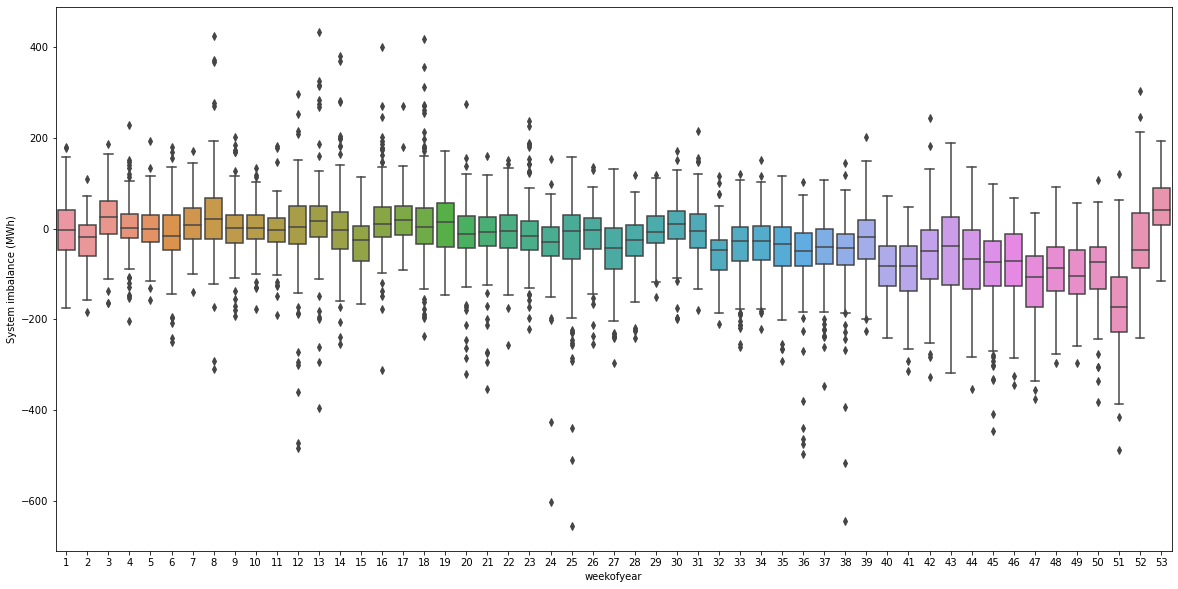

In [102]:
plt.figure(figsize=(20,10))
sns.boxplot(x='weekofyear', y='System imbalance (MWh)', data = df)
plt.show()

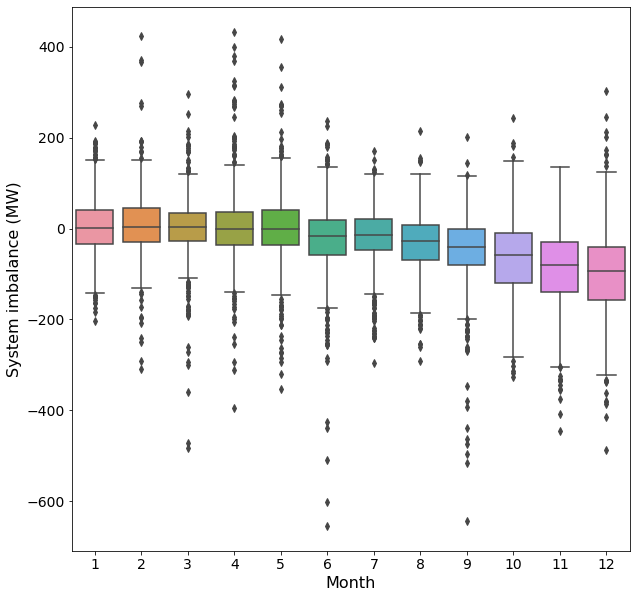

In [482]:
plt.figure(figsize=(10,10))
sns.boxplot(x='month', y='System imbalance (MWh)', data = df)
plt.xlabel('Month', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('System imbalance (MW)', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

# Forecasting

# Moving Average

In [667]:
dataset = data[['System imbalance (MWh)', 'Datetime']]
dataset.set_index('Datetime', inplace = True)

dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.9) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
from statsmodels.tsa.ar_model import AutoReg
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [669]:

test_predict = np.mean(X_test, axis=2)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

Test Mean Absolute Error: 62.940929249902084
Test Root Mean Squared Error: 80.89195102058063


In [670]:
mape = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("Testing MAPE: {}".format(mape))

Testing MAPE: 357.42866149526355


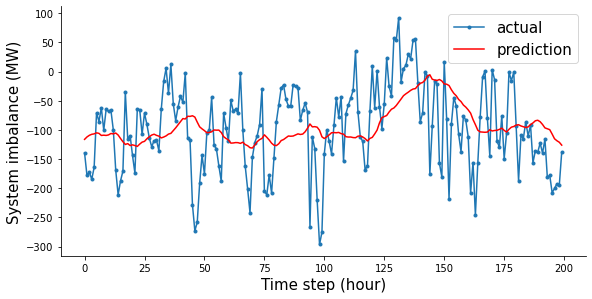

In [671]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('System imbalance (MW)', size=15)
plt.xlabel('Time step (hour)', size=15)
plt.legend(fontsize=15)
plt.show();

# LSTM Forecasting

In [ ]:
dataset = data[['System imbalance (MWh)', 'Datetime']]
dataset.set_index('Datetime', inplace = True)

dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.9) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
from statsmodels.tsa.ar_model import AutoReg
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [629]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
epochs = 500
batch_size = 128

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
    
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)
model.summary()

Epoch 1/500
50/50 [==============================] - 6s 40ms/step - loss: 0.0298 - val_loss: 0.0065 - lr: 0.0010
Epoch 2/500
50/50 [==============================] - 0s 10ms/step - loss: 0.0063 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/500
50/50 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0056 - lr: 0.0010
Epoch 4/500
50/50 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0055 - lr: 0.0010
Epoch 6/500
50/50 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0053 - lr: 0.0010
Epoch 7/500
50/50 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0053 - lr: 0.0010
Epoch 8/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0051 - lr: 0.0010
Epoch 9/500
50/50 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0050 - l

50/50 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0034 - lr: 5.0000e-04
Epoch 74/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0036 - lr: 5.0000e-04
Epoch 75/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0034 - lr: 5.0000e-04
Epoch 76/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0037 - lr: 5.0000e-04
Epoch 77/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0038 - lr: 5.0000e-04
Epoch 78/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0035 - lr: 5.0000e-04
Epoch 79/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0034 - lr: 5.0000e-04
Epoch 80/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0034 - lr: 5.0000e-04
Epoch 81/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0

Epoch 143/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0034 - lr: 1.0000e-04
Epoch 144/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0035 - lr: 1.0000e-04
Epoch 145/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0035 - lr: 1.0000e-04
Epoch 146/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0035 - lr: 1.0000e-04
Epoch 147/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0035 - lr: 1.0000e-04
Epoch 148/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0034 - lr: 1.0000e-04
Epoch 149/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0035 - lr: 1.0000e-04
Epoch 150/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0034 - lr: 1.0000e-04
Epoch 151/500
50/50 [==============================] - 0

In [630]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

27/27 [==============================] - 0s 1ms/step
Train Mean Absolute Error: 41.33456549805098
Train Root Mean Squared Error: 57.772101140842175
Test Mean Absolute Error: 49.782902495925626
Test Root Mean Squared Error: 64.57582070635439


In [631]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

Train MAPE: 316.4021506522956, Test MAPE: 174.40054930561638


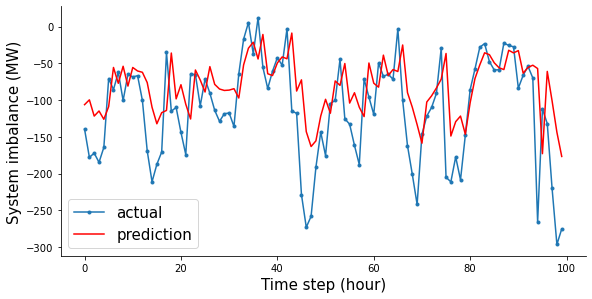

In [484]:
idx = 100
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('System imbalance (MW)', size=15)
plt.xlabel('Time step (hour)', size=15)
plt.legend(fontsize=15)
plt.show();

# LSTM Classification

In [516]:
data['LongShort']= data['System imbalance (MWh)'].apply(lambda x: 1 if x >=0 else 0)

In [517]:
data

,System imbalance (MWh),Datetime,LongShort
0,56.685,2021-01-01 01:00:00,1
1,35.897,2021-01-01 02:00:00,1
2,-62.325,2021-01-01 03:00:00,0
3,-14.414,2021-01-01 04:00:00,0
4,-54.224,2021-01-01 05:00:00,0
...,...,...,...
8755,66.526,2021-12-31 20:00:00,1
8756,124.414,2021-12-31 21:00:00,1
8757,113.625,2021-12-31 22:00:00,1
8758,96.231,2021-12-31 23:00:00,1


In [532]:
dataset = data[['Datetime', 'LongShort']]
dataset.set_index('Datetime', inplace = True)
dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler() # Min Max scaler
dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.9) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [577]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

epochs = 500
batch_size = 128

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["sparse_categorical_accuracy"])


history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)
model.summary()

Epoch 1/500
50/50 [==============================] - 4s 20ms/step - loss: 0.7225 - accuracy: 0.6256 - val_loss: 0.4360 - val_accuracy: 0.8187 - lr: 1.0000e-04
Epoch 2/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6262 - accuracy: 0.6529 - val_loss: 0.4294 - val_accuracy: 0.8212 - lr: 1.0000e-04
Epoch 3/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6184 - accuracy: 0.6540 - val_loss: 0.4235 - val_accuracy: 0.8225 - lr: 1.0000e-04
Epoch 4/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6132 - accuracy: 0.6653 - val_loss: 0.4204 - val_accuracy: 0.8238 - lr: 1.0000e-04
Epoch 5/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6070 - accuracy: 0.6700 - val_loss: 0.4170 - val_accuracy: 0.8270 - lr: 1.0000e-04
Epoch 6/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6052 - accuracy: 0.6714 - val_loss: 0.4157 - val_accuracy: 0.8295 - lr: 1.0000e-04
Epoch 7/500
50/50 [==============================] 

50/50 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7089 - val_loss: 0.4018 - val_accuracy: 0.8422 - lr: 1.0000e-04
Epoch 53/500
50/50 [==============================] - 0s 7ms/step - loss: 0.5774 - accuracy: 0.7115 - val_loss: 0.4009 - val_accuracy: 0.8422 - lr: 1.0000e-04
Epoch 54/500
50/50 [==============================] - 0s 5ms/step - loss: 0.5782 - accuracy: 0.7094 - val_loss: 0.4022 - val_accuracy: 0.8422 - lr: 1.0000e-04
Epoch 55/500
50/50 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.7100 - val_loss: 0.4014 - val_accuracy: 0.8416 - lr: 1.0000e-04
Epoch 56/500
50/50 [==============================] - 0s 4ms/step - loss: 0.5780 - accuracy: 0.7091 - val_loss: 0.4028 - val_accuracy: 0.8422 - lr: 1.0000e-04
Epoch 57/500
50/50 [==============================] - 0s 6ms/step - loss: 0.5792 - accuracy: 0.7108 - val_loss: 0.4008 - val_accuracy: 0.8416 - lr: 1.0000e-04
Epoch 58/500
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 5ms/step - loss: 0.5760 - accuracy: 0.7123 - val_loss: 0.4017 - val_accuracy: 0.8397 - lr: 1.0000e-04
Epoch 104/500
50/50 [==============================] - 0s 5ms/step - loss: 0.5743 - accuracy: 0.7145 - val_loss: 0.4009 - val_accuracy: 0.8403 - lr: 1.0000e-04
Epoch 105/500
50/50 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.7123 - val_loss: 0.4008 - val_accuracy: 0.8410 - lr: 1.0000e-04
Epoch 106/500
50/50 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.7104 - val_loss: 0.4030 - val_accuracy: 0.8410 - lr: 1.0000e-04
Epoch 107/500
50/50 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.7123 - val_loss: 0.4008 - val_accuracy: 0.8403 - lr: 1.0000e-04
Epoch 108/500
50/50 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.7116 - val_loss: 0.4021 - val_accuracy: 0.8410 - lr: 1.0000e-04
Epoch 109/500
50/50 [==============================] -

In [578]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

Test accuracy 0.9189189076423645
Test loss 0.26831403374671936
